In [21]:
#Installing libraries

install.packages('tidyverse')
install.packages('cluster')
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
#Loading libraries

library(tidyverse)
library(cluster)
library(dplyr)

## **Cluster Analysis**

In [23]:
# Reading the Dataset

customers <- read.csv("/content/sample_data/Mall_Customers.csv")

In [24]:
glimpse(customers)

Rows: 200
Columns: 5
$ CustomerID             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Genre                  <chr> "Male", "Male", "Female", "Female", "Female", "…
$ Age                    <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35,…
$ Annual.Income..k..     <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19,…
$ Spending.Score..1.100. <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15…


In [25]:
#Checking for null values

customers %>% is.na() %>% sum()

[1] 0

**Normalization**

In [26]:
ca_dataset <- customers %>%
    select(-CustomerID, -Genre, -Age)

In [10]:
can_dataset <- ca_dataset %>%
  mutate_all(function(x) (x - mean(x)) / sd(x))

In [27]:
can_dataset

Annual.Income..k..,Spending.Score..1.100.
<dbl>,<dbl>
-1.734646,-0.4337131
-1.734646,1.1927111
-1.696572,-1.7116178
-1.696572,1.0378135
-1.658498,-0.3949887
-1.658498,0.9990891
-1.620425,-1.7116178
-1.620425,1.6961281
-1.582351,-1.8277910


**Calculation Euclidean Distance**

In [28]:
eu_distance <- can_dataset %>% dist()
print(eu_distance, digits = 3)

         1      2      3      4      5      6      7      8      9     10
2   1.6264                                                               
3   1.2785 2.9046                                                        
4   1.4720 0.1595 2.7494                                                 
5   0.0854 1.5895 1.3172 1.4333                                          
6   1.4348 0.2081 2.7110 0.0543 1.3941                                   
7   1.2830 2.9066 0.0761 2.7505 1.3172 2.7110                            
8   2.1329 0.5162 3.4086 0.6627 2.0915 0.6981 3.4077                     
9   1.4024 3.0243 0.1629 2.8679 1.4348 2.8279 0.1223 3.5241              
10  1.2869 0.3803 2.5584 0.2248 1.2415 0.1726 2.5561 0.8528 2.6720       
11  0.9800 2.5990 0.3302 2.4423 1.0097 2.4021 0.3121 3.0982 0.4260 2.2460
12  2.3284 0.7135 3.6032 0.8596 2.2860 0.8939 3.6016 0.1973 3.7175 1.0456
13  0.9487 2.5629 0.3803 2.4057 0.9748 2.3649 0.3567 3.0602 0.4662 2.2076
14  1.4838 0.2454 2.7536 0.1523 1.4373

**Hierarchical Cluster Analysis**

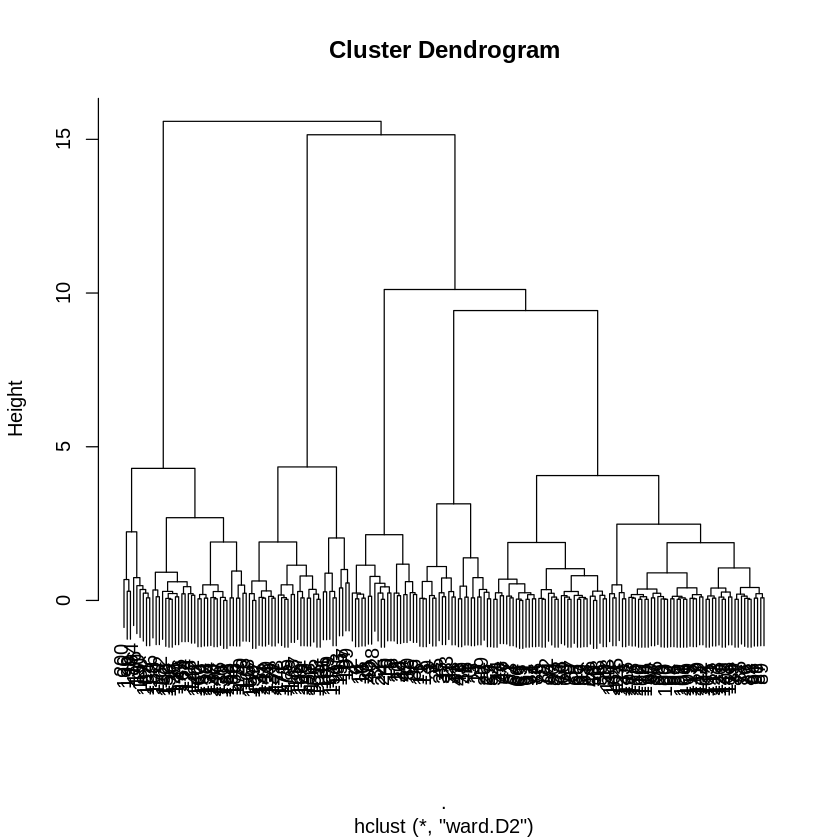

In [29]:
hc_analysis <- eu_distance %>% hclust(method = "ward.D2")
plot(hc_analysis)

# **K Means Clustring**

**Using Elbow Method for Determine Optimal Number**

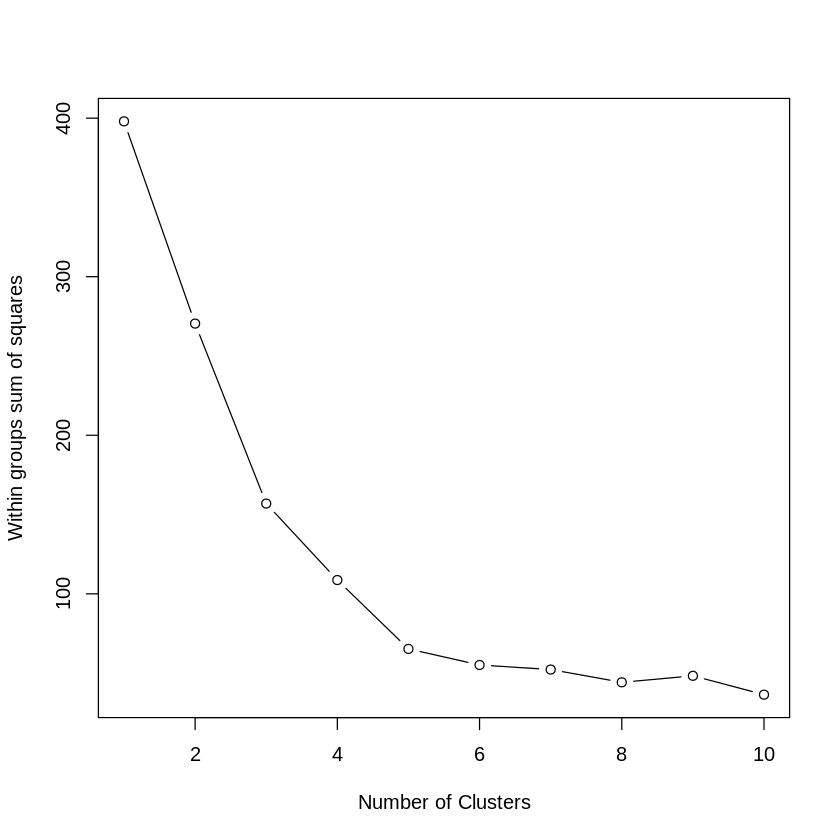

In [30]:
wss <- sapply(1:10, function(k) sum(kmeans(can_dataset, k)$withinss))
plot(1:10, wss, type = "b", xlab = "Number of Clusters", ylab = "Within groups sum of squares")

In [31]:
mall_clustering <- kmeans(can_dataset, 5)
print(mall_clustering)

K-means clustering with 5 clusters of sizes 101, 10, 39, 22, 28

Cluster means:
  Annual.Income..k.. Spending.Score..1.100.
1         -0.4717995             -0.2634792
2          1.8709508             -1.0920277
3          0.9891010              1.2364001
4         -1.3262173              1.1293439
5          0.6980031             -1.2690534

Clustering vector:
  [1] 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 [38] 4 1 4 1 4 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
[149] 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 2 3 2 3 2
[186] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3

Within cluster sum of squares by cluster:
[1] 62.997316  3.600881 19.655252  5.217630  6.842576
 (between_SS / total_SS =  75.3 %)

Available components:

[1] "cluster"      "centers"      "totss"   

**Adding the Cluster Details to the Customers Dataset**

In [33]:
rtc_data <- customers %>% mutate(cluster = mall_clustering$cluster)

In [34]:
glimpse(rtc_data)

Rows: 200
Columns: 6
$ CustomerID             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ Genre                  <chr> "Male", "Male", "Female", "Female", "Female", "…
$ Age                    <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35,…
$ Annual.Income..k..     <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19,…
$ Spending.Score..1.100. <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15…
$ cluster                <int> 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,…


**Summarizing the Clusters**

In [35]:
rtc_data %>% group_by(cluster) %>% summarize(across(-c(CustomerID, Genre, Age), mean))

cluster,Annual.Income..k..,Spending.Score..1.100.
<int>,<dbl>,<dbl>
1,48.16832,43.39604
2,109.70000,22.00000
3,86.53846,82.12821
4,25.72727,79.36364
5,78.89286,17.42857


In [40]:
rtc_data %>%
  select(cluster, Age, Genre) %>%
    group_by(cluster) %>%
    summarise(
    Male = sum(Genre == "Male"),
    Female = sum(Genre == "Female"),
    Other = sum(Genre == "Other"),
    Less_than_35 = sum(Age == 1),
    Above_35 = sum(Age == 2)
  )

cluster,Male,Female,Other,Less_than_35,Above_35
<int>,<int>,<int>,<int>,<int>,<int>
1,41,60,0,0,0
2,3,7,0,0,0
3,18,21,0,0,0
4,9,13,0,0,0
5,17,11,0,0,0
